# That One Team
*** 
<font color=red>Final Project: COVID-19 pandemic</font> <br>
<font color=darkred>Visualizing range and impact</font> 
***
_Members:_                   

Nick Bezinovich   nbezin2@uic.edu  www.github.com/nbezin2 <br>
Aaron Lau         alau8@uic.edu    www.github.com/AaronMLau <br>
Tony Makis        amakis2@uic.edu  www.github.com/TonyMakis <br>
Josh Peterson     jpeter62@uic.edu www.github.com/Jpeterson1352 <br>
Joshua Thomas     Jthoma90@uic.edu www.github.com/jthoma90
***
_Dataset sources:_
    
Sources
_Johns Hopkins Whiting School of Engineering Center for Systems Science and Engineering_ <br> https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data |
_New York Times_ <br> https://github.com/nytimes/covid-19-data                                                                   |


## Index


## Impact of COVID-19
_Source: Bing_
    
Below, you can see the current (as of compile time) impact of COVID-19 on Illinois. This issue is important and relevant, as this exploration will explore.

In [1]:
#!pip install ipython
import IPython

In [222]:
from IPython.display import IFrame, display, Latex, Markdown
IFrame('https://www.bing.com/covid/local/illinois_unitedstates', width = 900, height = 500)

## Abstract

The COVID-19 pandemic has affected our society in ways not seen in most people's lifetimes. Its impact is widespread and will continue to influence the ways we think about society in the years to come. As it continues to modify how we live day-to-day, many people are relying on Data Scientists to compile and abstract the data to better allow leaders and everyday citizens to make informed decisions and grasp the seriousness of what is going on.

Our group, ThatOneTeam, have seen much on the issue in the news and social media, and are using the platform of Data Science to better visualize and explain what we are seeing and hearing every day from our business, local, state, and national leaders. 

We hope that working with the data and providing clear, informative visualizations will allow others to quickly and easily determine what is going on now and what has happened in the past few months.

To achieve this, we are asking two primary questions: 

__What does the spread of the virus look like over time?__ 
_This question will allow us to infer what is going on today, and put into perspective terms such as “flattening the curve” repeated by our leaders._

__What does the spread of the virus look like in each country?__
_This will allow us to judge more accurately what the effect will be to us personally, as well as the world as a whole._

Using these questions as a focus, we then hope to model the future impact of COVID-19 using Machine Learning models to determine how many people will likely be affected by the disease and qualify where we are in the disease's reach.

Lastly, we hope to see how the “social distancing” methods are working, as well as portray the impact of not using social distancing would have on the spread of the virus.


## State of the Project

Our group has completely changed project and data, from previously exploring sales data, to now exploring the effect of COVID-19. See our updated slides submitted with this document.

#### Import statements

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import sklearn
import string
import os

## Data Acquisition & Cleaning

The data we are using is very recent, with daily updates. It is already very clean as it is being used as a trusted source by many national and international agencies. Though we do not have much cleaning to do, it is important to keep this project updated. Therefore, there is a script to pull data from the Johns Hopkins datasets daily to allow our analysis to remain relevant.

### Acquisition

To keep this relevant, we have designed a script to fetch data daily from our source.

### Cleaning

As shown, this data is nearly what we want. There are a few fields we could remove, but overall this data is very clean and does not have any members that need to be estimated or removed.

In [3]:
global_data = pd.read_csv('time_series_covid19_confirmed_global_iso3_regions.csv')
global_deaths = pd.read_csv('time_series_covid19_deaths_global_iso3_regions.csv')
global_recovered = pd.read_csv('time_series_covid19_recovered_global_iso3_regions.csv')

In [4]:
global_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/5/20,4/6/20,4/7/20,ISO 3166-1 Alpha 3-Codes,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name
0,#adm1+name,#country+name,#geo+lat,#geo+lon,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,#country+code,#region+main+code,#region+main+name,#region+sub+code,#region+sub+name,#region+intermediate+code,#region+intermediate+name
1,NaN,Afghanistan,33.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,11.0,14.0,AFG,142,Asia,34,Southern Asia,NaN,NaN
2,NaN,Albania,41.1533,20.1683,0.0,0.0,0.0,0.0,0.0,0.0,...,20.0,21.0,22.0,ALB,150,Europe,39,Southern Europe,NaN,NaN
3,NaN,Algeria,28.0339,1.6596,0.0,0.0,0.0,0.0,0.0,0.0,...,152.0,173.0,193.0,DZA,2,Africa,15,Northern Africa,NaN,NaN
4,NaN,Andorra,42.5063,1.5218,0.0,0.0,0.0,0.0,0.0,0.0,...,18.0,21.0,22.0,AND,150,Europe,39,Southern Europe,NaN,NaN


In [5]:
global_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/5/20,4/6/20,4/7/20,ISO 3166-1 Alpha 3-Codes,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name
0,#adm1+name,#country+name,#geo+lat,#geo+lon,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,#country+code,#region+main+code,#region+main+name,#region+sub+code,#region+sub+name,#region+intermediate+code,#region+intermediate+name
1,NaN,Afghanistan,33.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,18.0,18.0,AFG,142,Asia,34,Southern Asia,NaN,NaN
2,NaN,Albania,41.1533,20.1683,0.0,0.0,0.0,0.0,0.0,0.0,...,104.0,116.0,131.0,ALB,150,Europe,39,Southern Europe,NaN,NaN
3,NaN,Algeria,28.0339,1.6596,0.0,0.0,0.0,0.0,0.0,0.0,...,90.0,90.0,113.0,DZA,2,Africa,15,Northern Africa,NaN,NaN
4,NaN,Andorra,42.5063,1.5218,0.0,0.0,0.0,0.0,0.0,0.0,...,26.0,31.0,39.0,AND,150,Europe,39,Southern Europe,NaN,NaN


In [6]:
global_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/5/20,4/6/20,4/7/20,ISO 3166-1 Alpha 3-Codes,Region Code,Region Name,Sub-region Code,Sub-region Name,Intermediate Region Code,Intermediate Region Name
0,#adm1+name,#country+name,#geo+lat,#geo+lon,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,#country+code,#region+main+code,#region+main+name,#region+sub+code,#region+sub+name,#region+intermediate+code,#region+intermediate+name
1,NaN,Afghanistan,33.0,65.0,0.0,0.0,0.0,0.0,0.0,0.0,...,349.0,367.0,423.0,AFG,142,Asia,34,Southern Asia,NaN,NaN
2,NaN,Albania,41.1533,20.1683,0.0,0.0,0.0,0.0,0.0,0.0,...,361.0,377.0,383.0,ALB,150,Europe,39,Southern Europe,NaN,NaN
3,NaN,Algeria,28.0339,1.6596,0.0,0.0,0.0,0.0,0.0,0.0,...,1320.0,1423.0,1468.0,DZA,2,Africa,15,Northern Africa,NaN,NaN
4,NaN,Andorra,42.5063,1.5218,0.0,0.0,0.0,0.0,0.0,0.0,...,501.0,525.0,545.0,AND,150,Europe,39,Southern Europe,NaN,NaN


Below, we clean the data of excess columns to allow seaborn to plot our heatmap.

## Data Exploration

To see how the data maps out over space, we can see the following two diagrams, after cleaning the data.

In [7]:
sns.set()

In [8]:
df = global_deaths
df = df.drop(columns = ['Province/State',
                   'Country/Region',
                   'Lat',
                   'Long', 
                   'ISO 3166-1 Alpha 3-Codes', 
                   'Region Code', 
                   'Sub-region Code', 
                   'Sub-region Name', 
                   'Intermediate Region Code', 
                   'Intermediate Region Name'])
df = df.drop([0])
df = df.groupby(['Region Name'])
df = df.sum()
df = df.sum(axis = 1)
df = df.reset_index()
df = df.rename(columns = {0:'Deaths'})
df = df.sort_values(by='Deaths', ascending = False)
df

,Region Name,Deaths
3,Europe,542216.0
2,Asia,246433.0
1,Americas,89571.0
0,Africa,3967.0
4,Oceania,422.0


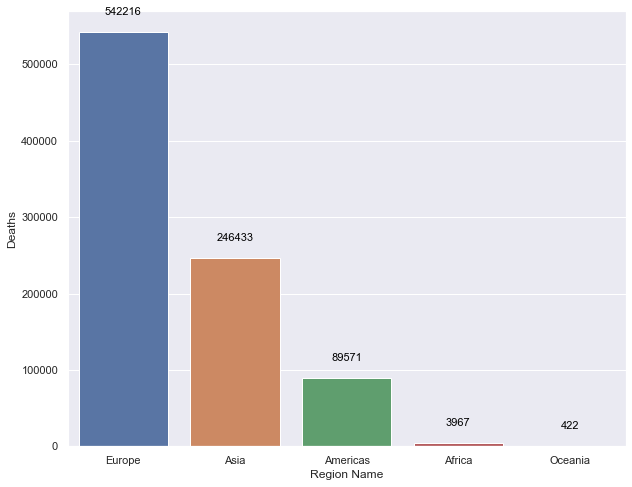

In [35]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x='Region Name', y = 'Deaths',ax=ax , data = df)
ax = g
for p in ax.patches:
             ax.annotate("%.2d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')

In [11]:
new_df = global_deaths
new_df = new_df.drop(columns = ['Province/State',
                                'Lat',
                                'Long',
                                'ISO 3166-1 Alpha 3-Codes',
                                'Region Code',
                                'Region Name',
                                'Sub-region Code',
                                'Sub-region Name',
                                'Intermediate Region Code',
                                'Intermediate Region Name'])
new_df = new_df.drop([0])
new_df = new_df.groupby('Country/Region')
new_df = new_df.sum()
new_df = new_df.sum(axis = 1)
new_df = new_df.reset_index()
new_df = new_df.rename(columns={0:'Deaths'})
new_df = new_df.sort_values(by='Deaths', ascending=False)
new_df

,Country/Region,Deaths
84,Italy,223179.0
36,China,169091.0
156,Spain,137486.0
171,US,77499.0
61,France,72246.0
...,...,...
59,Fiji,0.0
153,Somalia,0.0
155,South Sudan,0.0
57,Eswatini,0.0


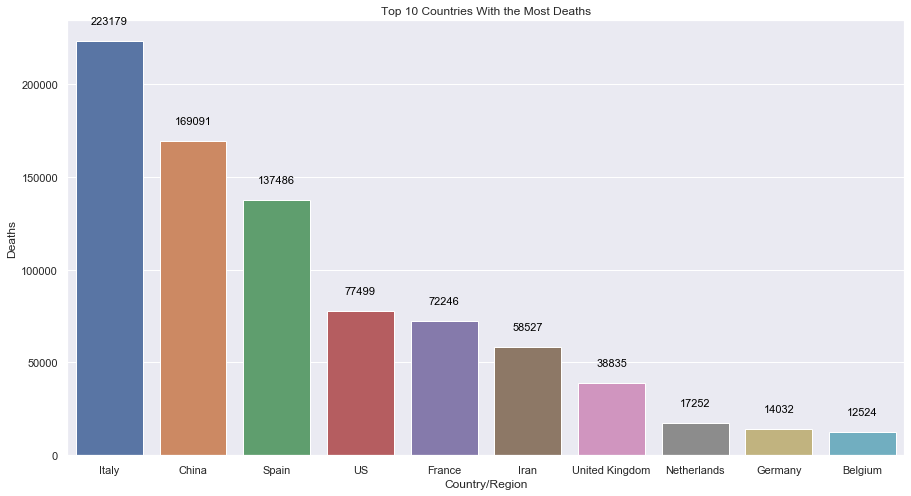

In [39]:
fig_dims = (15, 8)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x= 'Country/Region', y = 'Deaths',ax = ax, data = new_df.head(10))
g.set_title("Top 10 Countries With the Most Deaths")
ax = g
for p in ax.patches:
             ax.annotate("%.2d" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=11, color='black', xytext=(0, 20),
                 textcoords='offset points')

## Data Explanation

As you can see from the above bar plots, we can see the areas where the virus is currently causing the most deaths. This is useful to start exploring our first question, 'What does the virus look like in each country?'. The impact of the virus is felt most acutely in the death count, and visualizing where it is currently most severe can help leaders plan where to spend resources and individuals to know where their country is going.

We will explore the question of what the virus looks like in each country in the heatmap visualization that follows.

In [12]:
# Transform the global data to allow plotting
cln_global = pd.DataFrame.copy(global_data,deep=True)
cln_global = pd.DataFrame.drop(cln_global,columns=["Province/State",
                                                   "Country/Region",
                                                   "Lat",          
                                                   "Long",        
                                                   "Region Code",            
                                                   "Region Name",
                                                   "Sub-region Code",
                                                   "Sub-region Name",
                                                   "Intermediate Region Code",
                                                   "Intermediate Region Name"],errors='raise')
cln_global = pd.DataFrame.drop(cln_global,index=0,errors='raise')

global_hdrs = cln_global['ISO 3166-1 Alpha 3-Codes']
df = pd.DataFrame.drop(cln_global,columns=["ISO 3166-1 Alpha 3-Codes"],errors='raise')
pd.DataFrame.rename(df,mapper=global_hdrs,axis='index')

df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,120.0,170.0,174.0,237.0,273.0,281.0,299.0,349.0,367.0,423.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,212.0,223.0,243.0,259.0,277.0,304.0,333.0,361.0,377.0,383.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,511.0,584.0,716.0,847.0,986.0,1171.0,1251.0,1320.0,1423.0,1468.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,334.0,370.0,376.0,390.0,428.0,439.0,466.0,501.0,525.0,545.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,7.0,7.0,7.0,8.0,8.0,8.0,10.0,14.0,16.0,17.0


In [13]:
sns.set()
plt.rcParams['figure.figsize'] = (20.0, 10.0)
plt.rcParams['font.family'] = "serif"

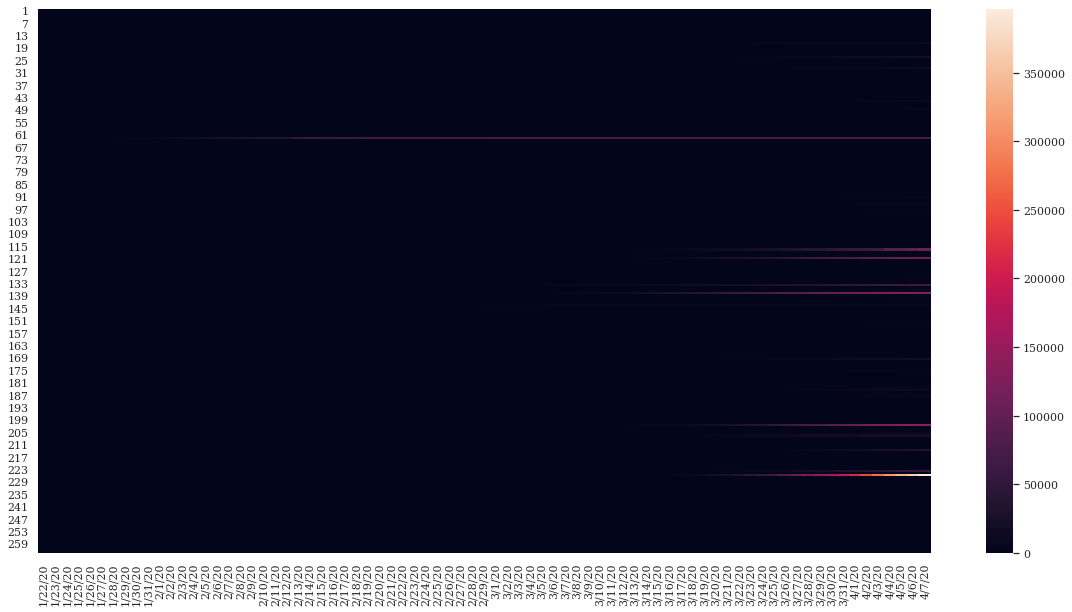

In [14]:
sns.heatmap(df)

### Data Explanation (Cont.)

This shows the worldwide impact over time. This helps us start to explore our previous question "What does the virus look like in each country?" over time, beginning to show how our first question plays into this. 

In [264]:
dailyData = pd.read_csv('./CSSEGISandData/csse_covid_19_data/csse_covid_19_daily_reports/04-26-2020.csv')

# og => organized Global Data
og = pd.DataFrame(
    dailyData.loc[dailyData['Country_Region'] == 'US']
)[['Province_State','Confirmed','Deaths','Recovered','Active']].copy()

stateInfo = og.groupby(['Province_State']).sum().reset_index()
stateInfo.head()

,Province_State,Confirmed,Deaths,Recovered,Active
0,Alabama,6421,219,0,6202
1,Alaska,340,9,0,331
2,Arizona,6534,275,0,6259
3,Arkansas,3001,51,0,2950
4,California,43558,1725,0,41833


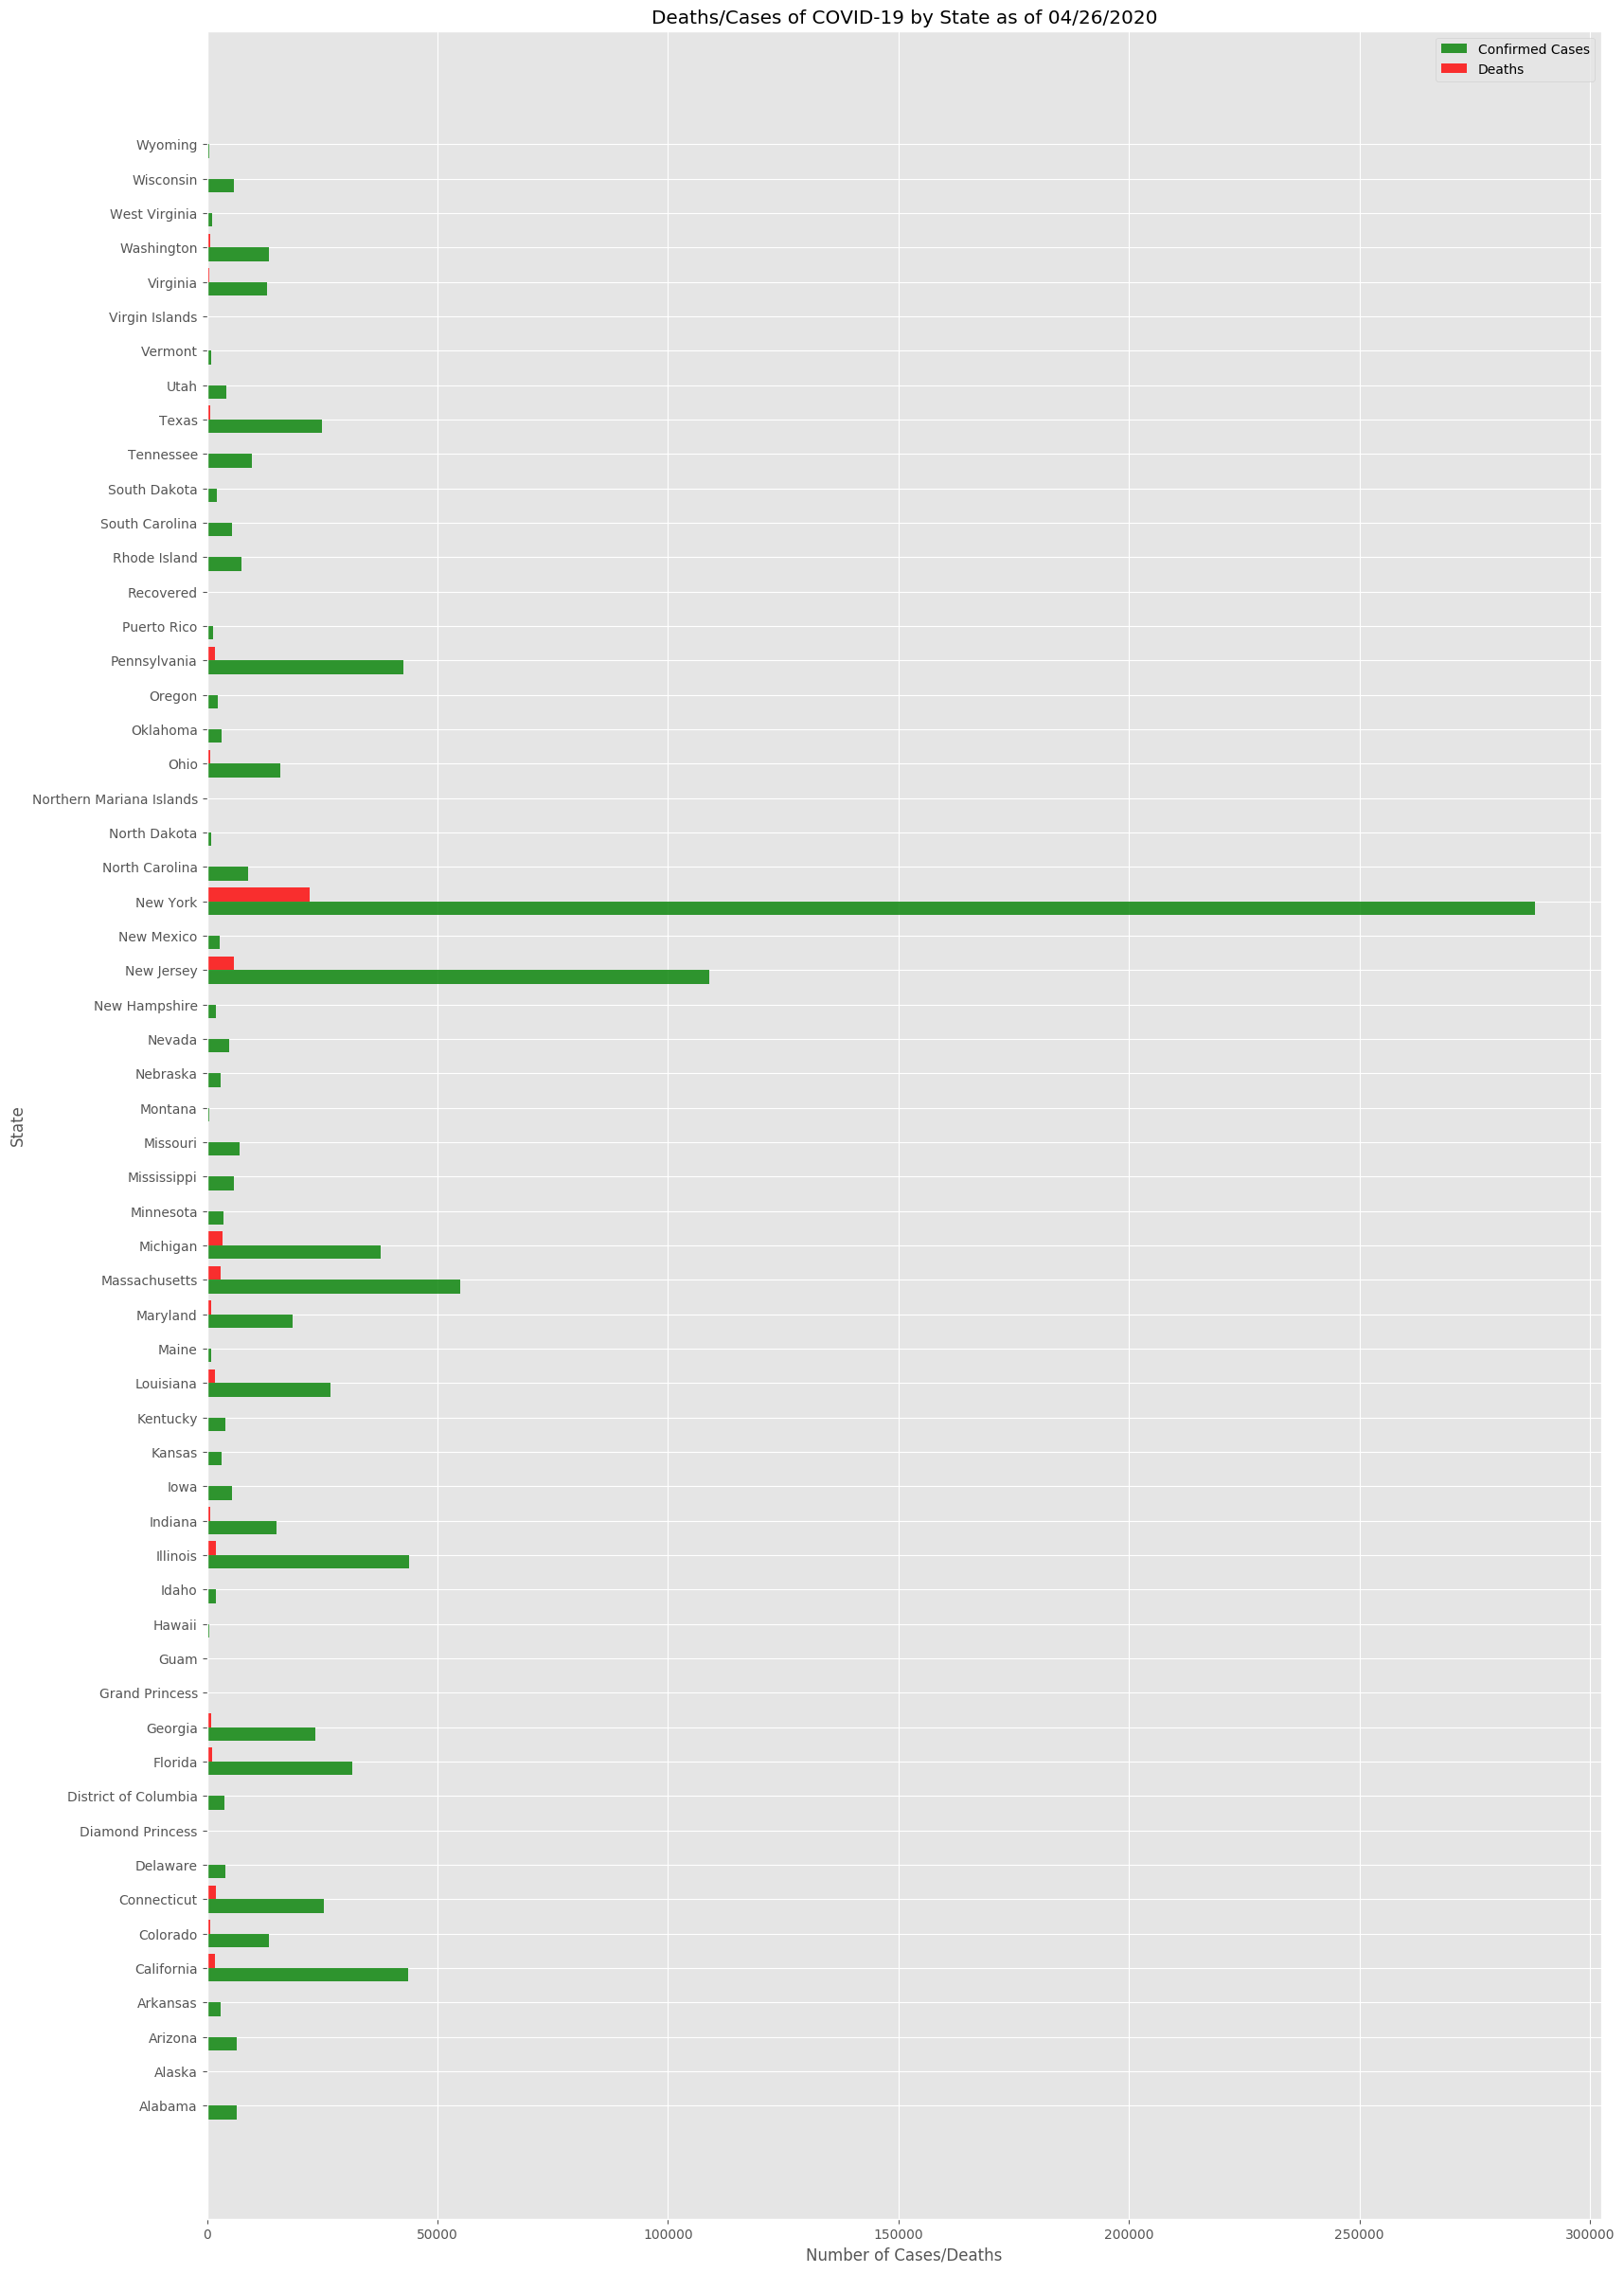

In [227]:
confirmed = stateInfo['Confirmed']
deaths = stateInfo['Deaths']
plt.style.use('ggplot')

# create plot
fig, ax = plt.subplots()
opacity = 0.8
index = np.arange(len(stateInfo['Province_State']))
bar_width=0.4

rects1 = plt.barh(index, confirmed, bar_width, alpha=opacity, color='g', label='Confirmed Cases')
rects2 = plt.barh(index + bar_width, deaths, bar_width, alpha=opacity, color='r', label='Deaths')
plt.yticks(index+bar_width/2, stateInfo['Province_State'])

plt.xlabel('Number of Cases/Deaths')
plt.ylabel('State')
plt.title('Deaths/Cases of COVID-19 by State as of 04/26/2020')
plt.legend()

fig = plt.gcf()
fig.set_size_inches(19,30)
plt.show()

### Data Explanation (Cont.)

This shows the national impact as of 4/26/2020. This helps us visualize how COVID-19 is affecting the U.S. In the spirit of relevancy, Illinois is actually in the top 5 for cases identified nationwide; also run this code block:

In [265]:
stateInfo.sort_values(by='Confirmed', ascending=False).head() # => Illinois #4

,Province_State,Confirmed,Deaths,Recovered,Active
35,New York,288045,22269,0,265776
33,New Jersey,109038,5938,0,103100
24,Massachusetts,54938,2899,0,52039
16,Illinois,43903,1933,0,41970
4,California,43558,1725,0,41833


Now, let us drill down into Illinois' Counties:

In [266]:
og = pd.DataFrame(
    dailyData[(dailyData.Country_Region == "US") & (dailyData.Province_State == "Illinois")]
)[['Admin2','Confirmed','Deaths','Recovered','Active']].copy()

countyInfo = og.groupby(['Admin2']).sum().reset_index()
countyInfo.head()

,Admin2,Confirmed,Deaths,Recovered,Active
0,Adams,32,0,0,32
1,Alexander,3,0,0,3
2,Bond,5,1,0,4
3,Boone,76,8,0,68
4,Bureau,10,0,0,10


In [268]:
# We can look at the top 10 counties in Illinois for their number of cases, then deaths
top10countiesCases = countyInfo.sort_values(by="Confirmed", ascending=False).head(10)
top10countiesCases.head()

,Admin2,Confirmed,Deaths,Recovered,Active
14,Cook,30574,1313,0,29261
46,Lake,2990,118,0,2872
20,DuPage,2443,131,0,2312
93,Will,2126,133,0,1993
41,Kane,1109,39,0,1070


In [325]:
top10countiesDeaths = countyInfo.sort_values(by="Deaths", ascending=False).head(10)
top10countiesDeaths.head()

,Admin2,Confirmed,Deaths,Recovered,Active
14,Cook,30574,1313,0,29261
93,Will,2126,133,0,1993
20,DuPage,2443,131,0,2312
46,Lake,2990,118,0,2872
41,Kane,1109,39,0,1070


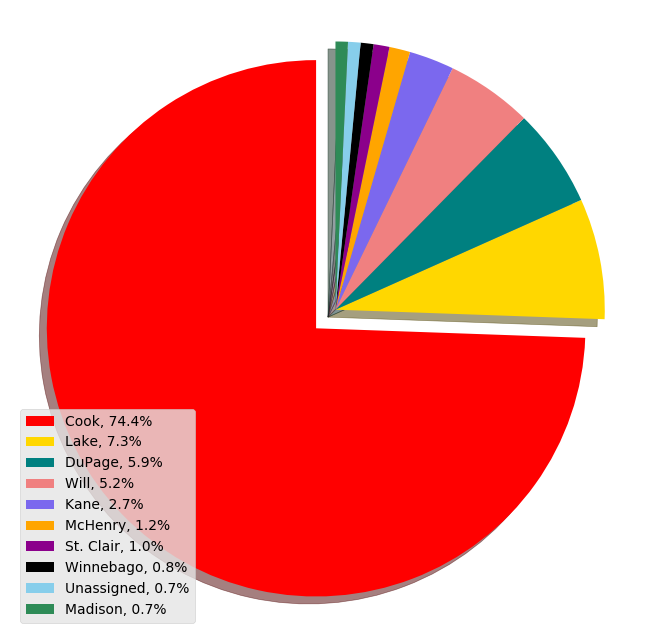

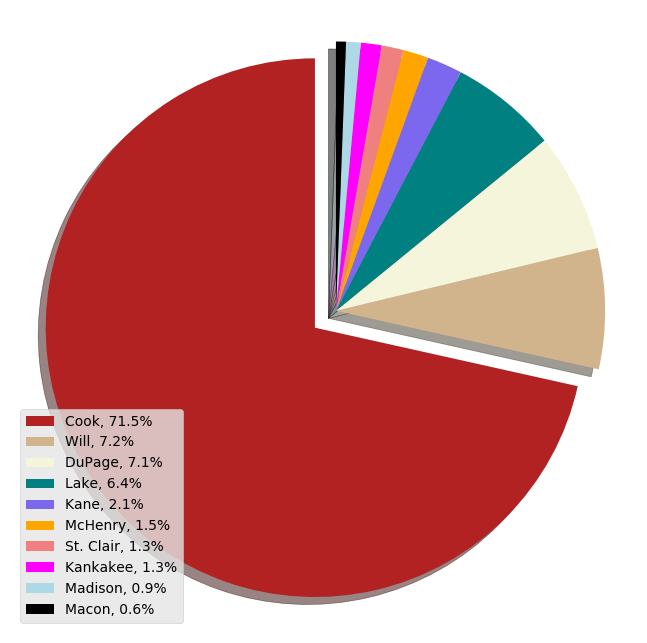

In [408]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
countyCasesNum = top10countiesCases['Confirmed'].sum() * 1.0

countyPercents = []
for c in top10countiesCases['Confirmed']:
    countyPercents.append(c / countyCasesNum * 100)
    
labels = []
for c in top10countiesCases['Admin2']:
    labels.append(c)

for i in range(10):
     labels[i] = labels[i] + ", " + str(round(countyPercents[i],1)) + "%"
    
sizes = top10countiesCases['Confirmed']

colors=['red', 'gold', 'teal', 'lightcoral',
        'mediumslateblue','orange','darkmagenta', 'black', 
        'skyblue', 'seagreen']

buckets = [0] * len(top10countiesCases['Admin2'])
buckets[0] = 0.1 # only "explode" the 'cook county' or 0th slice

fig1, ax1 = plt.subplots()

patches, texts = plt.pie(sizes, colors=colors, explode=buckets, startangle=90, shadow=True)

plt.legend(patches, labels, loc="lower left")

fig = plt.gcf()
fig.set_size_inches(8,8)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#---------------------------------------------------------------------------------------------

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
countyCasesNum = top10countiesDeaths['Deaths'].sum() * 1.0

countyPercents = []
for c in top10countiesDeaths['Deaths']:
    countyPercents.append(c / countyCasesNum * 100)
    
labels = []
for c in top10countiesDeaths['Admin2']:
    labels.append(c)

for i in range(10):
     labels[i] = labels[i] + ", " + str(round(countyPercents[i],1)) + "%"
    
sizes = top10countiesDeaths['Deaths']

colors=['firebrick', 'tan', 'beige', 'teal', 'mediumslateblue','orange',
        'lightcoral', 'magenta', 'lightblue', 'black']

buckets = [0] * len(top10countiesDeaths['Admin2'])
buckets[0] = 0.1 # only "explode" the 'cook county' or 0th slice

fig1, ax1 = plt.subplots()

patches, texts = plt.pie(sizes, colors=colors, explode=buckets, startangle=90, shadow=True)
plt.legend(patches, labels, loc="lower left")

fig = plt.gcf()
fig.set_size_inches(8,8)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

The first chart above is for the percentage share of the cases of COVID-19 per county, and the second one is for the percentage share of deaths due to COVID-19 per county, each for the top 10 counties in Illinois for 4.26.2020

## Statistical Approach: Machine Learning

We are still working on our statistical approach to analyze the data. 

## Reflection

#### Difficulties

As a team, we struggled to find a project and dataset that we were passionate about. With the impact of COVID-19, we all agreed to shift our focus from our multiple approaches to focus on exploring the data to make informed conclusions.

#### Insights

Working with the COVID-19 data has really framed the staggering reach this virus has spread to. While it is all over the news, looking at the data gives a blunt, clear picture of how devastating the virus has been. With the implementation of our statistical models, we hope to show not only the impact of the past few months, but also plan out the spread of the virus in the weeks to come.

#### Timeframe

As we have recently adopted this data and project, we have a lot of work to do to make a compelling and informative project. With all our other classes and the seriousness of our social state, we are wary of taking on too much for this project. While it is incredibly important and relevant, we ultimately want to deliver an informative approach by the final due date. While we have not been on track with this project in the past, it is my hope that our set focus will allow us to achieve a suitable answer to the two main questions we've posed.

#### Relevance

This project is not only very relevant, but is also useful and interesting. It is something we as a group realized we all were interested in, and will be what we present for the final project. 